# FAKE NEWS DETECTION PROJECT

### Introduction:
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

### About Dataset:
The dataset is in the form of .CSV (Comma Seperated Value) format and consists of **6 columns (5 features and 1 label) with 20800 number of records** as explained below:
- **id**: Unique id for each news article.
- **headline**: It is the title of the news.
- **news**: It contains the full text of the news article.
- **Unnamed0**: It is a serial number.
- **written_by**: It represent the author of the news article.
- **label**: It tells whether the news is fake(1) or not fake(0).

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
#loading dataset into dataframe
df_news = pd.read_csv("C:/Users/hp/Downloads/Fake-news-project/Fake news project/train_news.csv")

#interpreting first 5 rows
df_news.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


## Data Analysis

In [3]:
#checking shape of train dataset
print ('Shape =',df_news.shape)

Shape = (20800, 6)


In [4]:
#checking general information of dataset
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


### Remarks:
- There are **20800 records with 6 columns (3 int type and 3 object type)**.
- A few columns like headline, news, written by consist of null values i.e some values are missing which we would be treating going ahead

In [5]:
# Let's see how many Null Values are present in each column
print(df_news.isnull().sum())

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64


### Remarks:
- The columns that contain null values/missing values are
-- Headline = 558 missing values
-- written by = 1957 missing values
-- news = 39 missing values

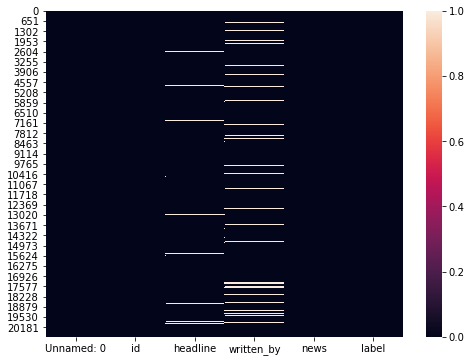

In [6]:
#Lets visualize the null values to get a better idea
plt.figure(figsize=(8,6))
sns.heatmap(df_news.isnull())
plt.show()

#### Remarks:
- From the above interpretion it is clear that the feature headline, written_by and news containes 558, 1957 and 39 null values respectively and needs to be treated accordingly.

#### Checking column Unnamed: 0

In [7]:
df_news["Unnamed: 0"]

0            0
1            1
2            2
3            3
4            4
         ...  
20795    20795
20796    20796
20797    20797
20798    20798
20799    20799
Name: Unnamed: 0, Length: 20800, dtype: int64

### Remarks:
- This column consist of continuos data and represents the serial no and does not have any significant importance for our target interpretation so we can drop this column.

#### Checking column id

In [8]:
df_news["id"]

0         9653
1        10041
2        19113
3         6868
4         7596
         ...  
20795     5671
20796    14831
20797    18142
20798    12139
20799    15660
Name: id, Length: 20800, dtype: int64

#### Remarks:
- This column contains continuous data and represents the id of the record, therefore, it can be **dropped** from the dataset as it is of no use in model training.

#### Checking column headline

In [9]:
df_news["headline"]

0        Ethics Questions Dogged Agriculture Nominee as...
1        U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2        Cotton to House: ’Do Not Walk the Plank and Vo...
3        Paul LePage, Besieged Maine Governor, Sends Co...
4                             A Digital 9/11 If Trump Wins
                               ...                        
20795                                                  NaN
20796          Albert Pike and the European Migrant Crisis
20797    Dakota Access Caught Infiltrating Protests to ...
20798    How to Stretch the Summer Solstice - The New Y...
20799    Emory University to Pay for ’100 Percent’ of U...
Name: headline, Length: 20800, dtype: object

#### Remarks:
- This column contains **textual data and is of object type** and represents the headlines of the news which would help us to train and predict the output of the data and hence is of significant importance

#### Checking column written_by

In [10]:
df_news["written_by"]

0        Eric Lipton and Steve Eder
1                   David Waldstein
2                           Pam Key
3                      Jess Bidgood
4                 Finian Cunningham
                    ...            
20795                NeverSurrender
20796                 Rixon Stewart
20797                   Eddy Lavine
20798                Alison S. Cohn
20799                  Tom Ciccotta
Name: written_by, Length: 20800, dtype: object

#### Remarks:
- This column contains **textual data and is of object type** and identifies the writer of the news which could going ahead help us predict the output hence is of significant importance

#### Checking column news

In [11]:
df_news["news"]

0        WASHINGTON  —   In Sonny Perdue’s telling, Geo...
1        HOUSTON  —   Venezuela had a plan. It was a ta...
2        Sunday on ABC’s “This Week,” while discussing ...
3        AUGUSTA, Me.  —   The beleaguered Republican g...
4          Finian Cunningham has written extensively on...
                               ...                        
20795    No, you'll be a dog licking of the vomit of yo...
20796    By Rixon Stewart on November 5, 2016 Rixon Ste...
20797    posted by Eddie You know the Dakota Access Pip...
20798    It’s officially summer, and the Society Boutiq...
20799    Emory University in Atlanta, Georgia, has anno...
Name: news, Length: 20800, dtype: object

#### Remarks:
- This column contains **textual data and is of object type** and repredents the actual news to be verified and hence is of significant importance.

#### Checking target column label

In [12]:
df_news["label"]

0        0
1        0
2        0
3        0
4        1
        ..
20795    1
20796    1
20797    1
20798    0
20799    0
Name: label, Length: 20800, dtype: int64

#### Remarks:
- This column is our target column contains **categorical data which is 0 (not fake) and 1(fake)** and is important to train our model.

In [13]:
# Let's drop Unnamed: 0  & id from dataset as it does not seem important
df_news.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [14]:
# imputing 'Written_by' feature with unknown because sometimes there are anonymus authors,...
# filling up empty values in 'headline'  with 'No Headline'
# Dropping empty values in rows because we are detecting fake news here and for this news is needed..

df_news['written_by'].fillna('Unknown ',inplace=True)
df_news['headline'].fillna('no headlines ',inplace=True)
df_news.dropna(subset=['news'],inplace=True)
df_news.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


<AxesSubplot:>

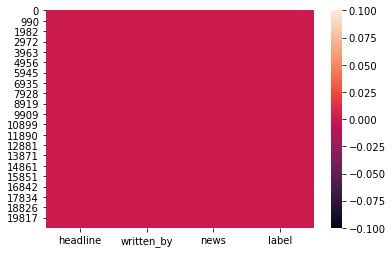

In [15]:
sns.heatmap(df_news.isnull())

In [16]:
#checking the ratio of data between label 0 and 1.
label_0 = len(df_news.label[df_news.label == 0])
label_1 = len(df_news.label[df_news.label == 1])
total_record = len(df_news)

print("Total Records for label[0]: ",label_0)
print("% of Records for label[0] : ",round(label_0*100/total_record,2))
print("\n")
print("Total Records for label[1]: ",label_1)
print("% of Records for label[1] : ",round(label_1*100/total_record,2))

Total Records for label[0]:  10387
% of Records for label[0] :  50.03


Total Records for label[1]:  10374
% of Records for label[1] :  49.97


#### Remarks:
- Dataset contains almost equal number of records for label 0 and label 1,therefore, dataset is balanced.

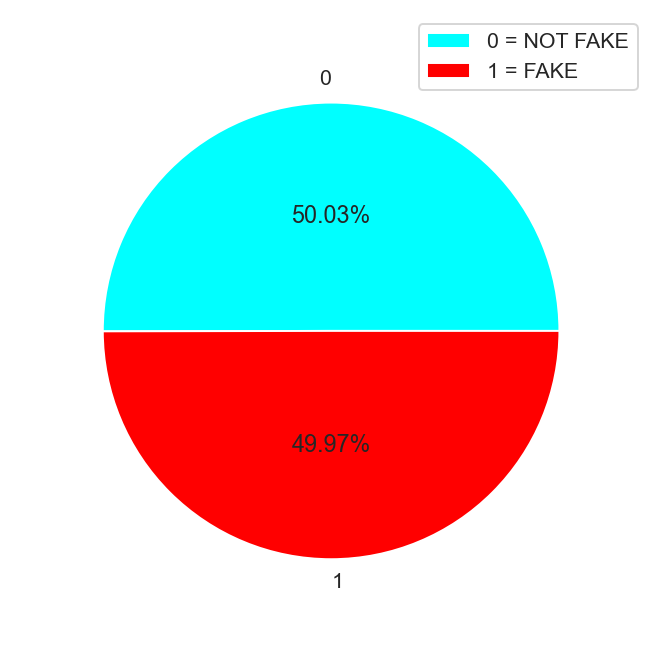

In [17]:
lb=df_news['label'].value_counts().index.tolist()
val=df_news['label'].value_counts().values.tolist()
clr=('cyan','red')
plt.figure(figsize=(10,6),dpi=140)
sns.set_context('paper',font_scale=0.4)
sns.set(style='whitegrid')
plt.pie(x=val,labels=lb,colors=clr,autopct='%2.2f%%',pctdistance=0.5,radius=0.9)
plt.legend(["0 = NOT FAKE",'1 = FAKE'])
plt.show()

In [18]:
# Checking how many distinct writers are there
df_news['written_by'].value_counts()

Unknown                                                                                                   1918
Pam Key                                                                                                    243
admin                                                                                                      193
Jerome Hudson                                                                                              166
Charlie Spiering                                                                                           141
                                                                                                          ... 
pac522                                                                                                       1
Scientists Find A Plant That Could Treat Diabetes &amp; Kill Cancer Cells – Collective Evolution | SFO       1
hivdatingsites                                                                                               1
B

In [19]:
#importing required libraries
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [20]:
#New columns for checking length of headline and news feature
df_news['length_headline'] = df_news.headline.str.len()
df_news['length_news'] = df_news.news.str.len()
df_news.head()

,headline,written_by,news,label,length_headline,length_news
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,72,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,100,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,100,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,28,9164


#### Converting text column to lower case and storing the length of each news to column original_length

In [21]:
#converting all the text to lower form
df_news['headline'] = df_news.headline.str.lower()
df_news['written_by'] = df_news.written_by.str.lower()
df_news['news'] = df_news.news.str.lower()
df_news.head()

,headline,written_by,news,label,length_headline,length_news
0,ethics questions dogged agriculture nominee as...,eric lipton and steve eder,"washington — in sonny perdue’s telling, geo...",0,84,7936
1,u.s. must dig deep to stop argentina’s lionel ...,david waldstein,houston — venezuela had a plan. it was a ta...,0,72,6112
2,cotton to house: ’do not walk the plank and vo...,pam key,"sunday on abc’s “this week,” while discussing ...",0,100,425
3,"paul lepage, besieged maine governor, sends co...",jess bidgood,"augusta, me. — the beleaguered republican g...",0,100,6516
4,a digital 9/11 if trump wins,finian cunningham,finian cunningham has written extensively on...,1,28,9164


#### Removing & Replacing Special characters

In [22]:
#Replacing '\n' with white space (' ')
df_news['headline'] = df_news['headline'].str.replace('\n',' ')
df_news['written_by'] = df_news['written_by'].str.replace('\n',' ')
df_news['news'] = df_news['news'].str.replace('\n',' ')

#Keeping only text and number data i.e., a to z, 0 to 9 and words like hasn't, cann't shouldn't etc.
df_news['headline'] = df_news['headline'].apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z'0-9]+")))
df_news['written_by'] = df_news['written_by'].apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z'0-9]+")))
df_news['news'] = df_news['news'].apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z'0-9]+")))

In [23]:
#replacing numbers i.e., 0 to 9 with number
df_news['headline'] = df_news['headline'].str.replace('\d+','number')
df_news['written_by'] = df_news['written_by'].str.replace('\d+','number')
df_news['news'] = df_news['news'].str.replace('\d+','number')

#interpreting random 5 rows to see changes
df_news.sample(5)

,headline,written_by,news,label,length_headline,length_news
12422,morgen in pams number number kommt die n chste...,noreply blogger com der postillon,morgen in pams number number kommt die n chste...,1,74,426
17637,no food no medicine no respite a starving boy ...,nicholas casey,matur n venezuela his name was kevin lara lugo...,0,90,8156
5292,uk announces new troop deployment near russia'...,unknown,military british defense secretary michael fal...,1,55,2300
14679,paintings 'almost no one else seemed to be doing',marisa martin,print when judith gait met father x it was a l...,1,49,8470
19892,russian us fighter jets near miss over syria,the daily sheeple,a russian fighter jet nearly collided with a u...,1,46,1207


#### Getting Most Common Words

In [24]:
from collections import Counter
#for counting frequently occurence of words occuring=f in fake and real news headline.
count1 = Counter(" ".join(df_news[df_news['label']==1]["headline"]).split()).most_common(50)
count2 = Counter(" ".join(df_news[df_news['label']==0]["headline"]).split()).most_common(50)
dataframe=pd.DataFrame()
print("TOP 50 Words in Each Category (Word,Counts)")
dataframe['Most Frequent Words in Fake News']=count1
dataframe['Most Frequent Words in real/authentic news']=count2
dataframe

TOP 50 Words in Each Category (Word,Counts)


,Most Frequent Words in Fake News,Most Frequent Words in real/authentic news
0,"(the, 3483)","(the, 8307)"
1,"(to, 2623)","(new, 6686)"
2,"(number, 2213)","(york, 6345)"
3,"(of, 1929)","(times, 6292)"
4,"(in, 1674)","(to, 2881)"
5,"(s, 1503)","(s, 2475)"
6,"(trump, 1410)","(breitbart, 2399)"
7,"(a, 1269)","(trump, 2272)"
8,"(and, 1219)","(in, 2220)"
9,"(for, 1190)","(of, 1894)"


In [25]:
#for counting frequently occurence of word in fake and real news.
count1 = Counter(" ".join(df_news[df_news['label']==1]["news"]).split()).most_common(50)
count2 = Counter(" ".join(df_news[df_news['label']==0]["news"]).split()).most_common(50)
dataframe=pd.DataFrame()
print("TOP 50 Words in Each Category (Word,Counts)")
dataframe['Most Frequent Words in fake news']=count1
dataframe['Most Frequent Words in real/authentic news']=count2
dataframe

TOP 50 Words in Each Category (Word,Counts)


,Most Frequent Words in fake news,Most Frequent Words in real/authentic news
0,"(the, 381972)","(the, 538540)"
1,"(to, 180524)","(to, 245757)"
2,"(of, 179802)","(of, 238367)"
3,"(and, 166661)","(a, 236826)"
4,"(a, 132037)","(and, 216366)"
5,"(in, 121410)","(in, 189819)"
6,"(number, 103886)","(that, 127609)"
7,"(that, 89890)","(number, 113454)"
8,"(is, 81848)","(s, 110003)"
9,"(s, 58923)","(for, 86245)"


#### Removing Stopwords

In [26]:
#initialzing stop words as set
stop_words = set(stopwords.words('english'))
print("Original Stopwords: ",len(stop_words))

#adding custom stop words i.e., a to z, to stop_words set
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))

stop_words.update(['could','would','us','also','mr','ms','mrs','among','put'])
print(stop_words)
print("Total Stopwords: ",len(stop_words))

Original Stopwords:  179
{'e', 'w', 'doing', 'isn', "wasn't", 'nor', 'now', 'again', 'very', 'about', 'too', 'hers', "you'll", "hasn't", 'do', 'v', 'z', 'mrs', 'aren', 'what', 'y', 'ours', 'no', 'f', 'me', 'between', 'they', "isn't", "it's", 'why', 'which', 'few', 'myself', "wouldn't", "don't", 'weren', 'his', 's', 'himself', 'before', "shouldn't", 'mustn', 'through', 'n', 'my', 'below', "shan't", 'while', "won't", 'their', 've', "that'll", 'where', "she's", 'in', 'all', 'b', 'more', "you're", 'whom', 'an', 'j', 'u', 'put', 'over', 'don', 'just', 'your', "couldn't", 'be', 'shan', 'is', 'above', "should've", 'with', 'own', 'him', 'mr', 'ms', 'for', 'themselves', 'p', 'c', 'it', "needn't", 'will', 'she', 'here', 'both', 'were', 'most', 'needn', 'll', 'being', 'did', 'or', 'down', 'off', 'to', 'once', 'has', 'any', 'so', 'yourself', 'these', 'x', 'at', 'when', 'them', 'h', 'against', 'other', 'out', 'each', 'then', 'the', 'am', 'because', 'have', 'm', 're', 'into', "hadn't", "mustn't", 'w

In [27]:
#removing stopwords
df_news['headline'] = df_news['headline'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df_news['written_by'] = df_news['written_by'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df_news['news'] = df_news['news'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [28]:
#interpreting random 5 rows to see the change
df_news.sample(5)

,headline,written_by,news,label,length_headline,length_news
2260,ankara benefit mosul operation city avoids tra...,unknown,wed number oct number number number utc sputni...,1,74,1558
5806,big question economy much room grow new york t...,neil irwin,important issue united states economy number b...,0,91,7696
7780,trump deliver obama people wanted major change...,contributing author,article written michael krieger originally pub...,1,93,12659
7816,checking trump hotels new york times,stephanie rosenbloom,alien beamed doral fla gold letters spanish bu...,0,48,12097
915,mcfarland deputy national security adviser exp...,charlie savage,washington mcfarland former fox news commentat...,0,96,3999


#### Removing Punctuations & Storing length of text after cleansing in column new_length

In [29]:
#removing punctuations
df_news['headline'] = df_news['headline'].str.replace("[^\w\d\s]","")
df_news['written_by'] = df_news['written_by'].str.replace("[^\w\d\s]","")
df_news['news'] = df_news['news'].str.replace("[^\w\d\s]","")
#storing length of each text in column new_length
df_news["new_headline_length"] = df_news['headline'].str.len()
df_news["new_writer_length"] = df_news['written_by'].str.len()
df_news["new_news_length"] = df_news['news'].str.len()
#interpreting random 10 rows to see the change
df_news.sample(10)

,headline,written_by,news,label,length_headline,length_news,new_headline_length,new_writer_length,new_news_length
9929,ramsay bolton game thrones hated man tv new yo...,jeremy egner,beverly hills calif like many successful actor...,0,83,7695,54,12,5064
6840,iowa cop killer mad police arresting black tee...,grant stern,comments special occupy democrats carlos mille...,1,85,3725,59,11,2523
3141,art depicting cannibalism found podestas campa...,european union times,clinton campaign chairman john podesta new yor...,1,60,2643,56,20,1888
6058,renzi violent scuffles erupt anti govt protest...,truth broadcast network,number shoina village drowned waist sand deniz...,1,90,1083,65,23,778
3829,headlines,jdhank,thats blow torch,1,13,20,9,6,16
11197,clinton passive management approach revealed h...,brenda walker,,1,84,1,66,13,0
6063,number number isis probably killed mosul fighting,jason ditz,forces still several kilometers mosul jason di...,1,52,1228,49,10,913
5603,white house petition remove soros owned voting...,quest,change white house website features petition r...,1,85,2243,85,5,1717
10444,patriot act number feel safer,joe massprivatei,posted october number number joe massprivatei ...,1,37,463,29,16,348
4480,achieving mindfulness work meditation cushion ...,matthew may,recent seminar gave number business profession...,0,82,5122,69,11,3356


## Exploratory Data Analysis (EDA)

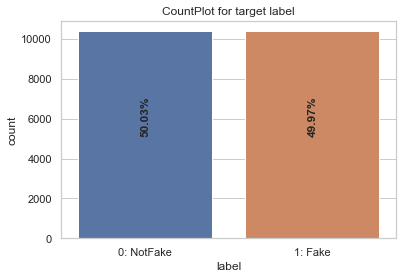

In [30]:
#checking target label using count plot
ax = sns.countplot(x="label",data=df_news)
k=0
for i in ax.patches:
    plt.text(k,i.get_height()/2,f"{round(i.get_height()*100/len(df_news.label),2)}%",ha="center",rotation=90,fontweight="bold")
    k += 1
    
ax.set_xticklabels(['0: NotFake','1: Fake'])
plt.title("CountPlot for target label")
plt.show()

#### Remarks:
- There are almost equal number of records available for fake (1) and Not Fake (0) label.
- **Dataset is balanced.**

#### Checking the news text length distribution before and after cleansing

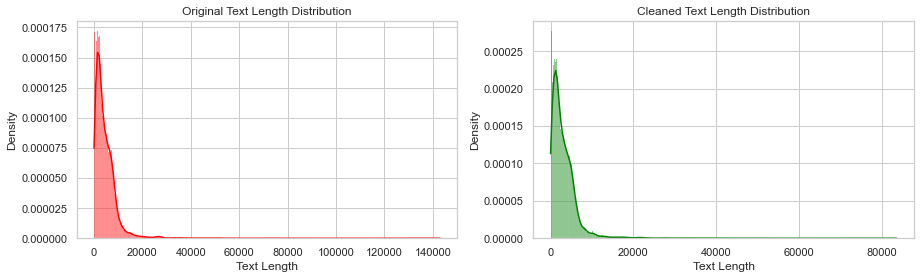

In [31]:
#checking the text length distribution using column original_length and new_length
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

#for original_length
sns.histplot(df_news.length_news,ax=ax1,color="red",stat="density",kde=True)
ax1.set_title("Original Text Length Distribution")
ax1.set_xlabel("Text Length")

#for new_length
sns.histplot(df_news.new_news_length,ax=ax2,color="green",stat="density",kde=True)
ax2.set_title("Cleaned Text Length Distribution")
ax2.set_xlabel("Text Length")

plt.show()

### WordCloud: Getting sense of loud words

In [32]:
#importing required libraries
from wordcloud import WordCloud

In [33]:
#getting wordcloud for fake news i.e. label = 1
word_cloud_1 = WordCloud(width=500,height=500,background_color="white",max_words=80).generate(' '.join(df_news['news'][df_news.label==1]))

#getting wordcloud for not fake news i.e. label = 0
word_cloud_0 = WordCloud(width=500,height=500,background_color="white",max_words=80).generate(' '.join(df_news['news'][df_news.label==0]))


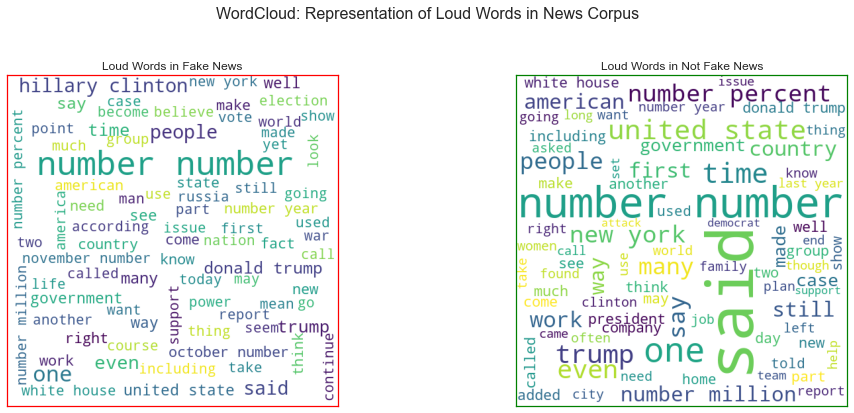

In [34]:
#displaying wordcloud using matplotlib
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
fig.subplots_adjust(wspace=0.3)
fig.suptitle("WordCloud: Representation of Loud Words in News Corpus",fontsize=16)

#displaying wordcloud for label = 1
ax1.imshow(word_cloud_1)
ax1.set_title("Loud Words in Fake News")
for spine in ax1.spines.values():
    spine.set_edgecolor("red")

ax1.set_xticks([])
ax1.set_yticks([])
#displaying wordcloud for label = 0
ax2.imshow(word_cloud_0)
ax2.set_title("Loud Words in Not Fake News")
for spine in ax2.spines.values():
    spine.set_edgecolor("green")

ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout(pad=2)
plt.show()

#### Remarks:
- Loud words in Fake news are numbers, hillary clinton, donald trump, america, united state, people, war, etc.
- Loud words in Not Fake news are new york, trump, united state, support, help, democrat etc.

In [35]:
# Split feature and label

# creating the TF-IDF vectorizer fn in order to convert the tokens from the train documents into vectors so that machine can do further processing
def Tf_idf(text):
    tfid = TfidfVectorizer(min_df=2)
    return tfid.fit_transform(text)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# Inserting vectorized values in a variable x, which will be used in training the model 
x=Tf_idf(df_news['written_by'] + df_news['headline'] + df_news['news'])

# checking the shape of the data which is inserted in x which will be used for model training.
print("Shape of x: ",x.shape)

Shape of x:  (20761, 81774)


In [38]:
y = df_news['label']

In [39]:
y.shape

(20761,)

## Preparing Data for Model Training & Testing

In [40]:
# Importing useful libraries for model training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques...

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score


# Creating instances for different Classifiers

RF=RandomForestClassifier()
LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()
XG=XGBClassifier(eval_metric='mlogloss')

In [41]:
# List of Models
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [42]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

** LogisticRegression **


LogisticRegression()


Max Accuracy Score corresponding to Random State  50 is: 0.9542462674586611


Accuracy Score :  0.9542462674586611
Cross Val Score :  0.9902966062348991
roc auc score :  0.9542460248896197


Log loss :  1.5802960372109822
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3116
           1       0.95      0.95      0.95      3113

    accuracy                           0.95      6229
   macro avg       0.95      0.95      0.95      6229
weighted avg       0.95      0.95      0.95      6229



Confusion Matrix:
 [[2975  141]
 [ 144 2969]]





** MultinomialNB() **


MultinomialNB()


Max Accuracy Score corresponding to Random State  69 is: 0.8972547760475197


Accuracy Score :  0.8972547760475197
Cross Val Score :  0.9787249718188564
roc auc score :  0.8972142372023075


Log loss :  3.548701761020034
Classification Report:
               precision    recall  f1

G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is depre

G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is depre

G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is depre

G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Accuracy Score corresponding to Random State  50 is: 0.9723872210627709




G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy Score :  0.9723872210627709


G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is depre

Cross Val Score :  0.9959190872984516
roc auc score :  0.9723896888570724


Log loss :  0.9537246907790211
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3116
           1       0.97      0.98      0.97      3113

    accuracy                           0.97      6229
   macro avg       0.97      0.97      0.97      6229
weighted avg       0.97      0.97      0.97      6229



Confusion Matrix:
 [[3014  102]
 [  70 3043]]







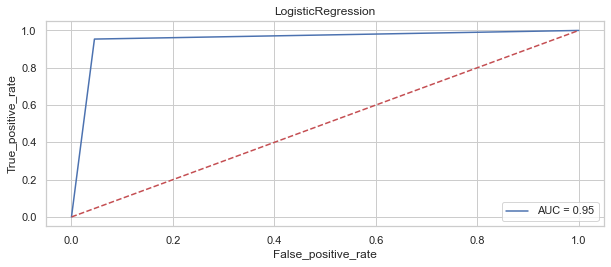

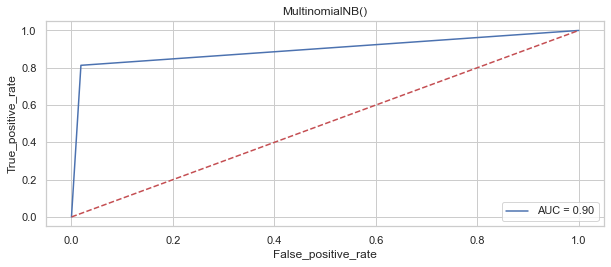

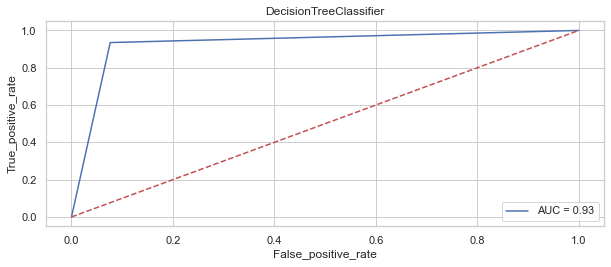

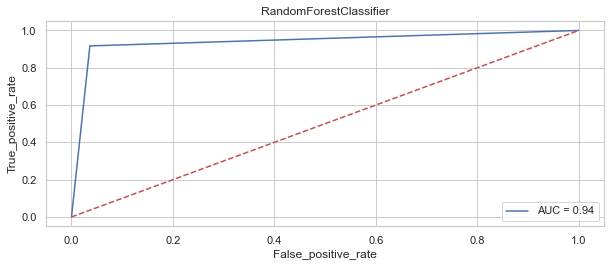

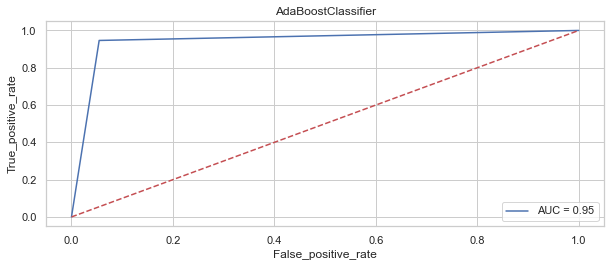

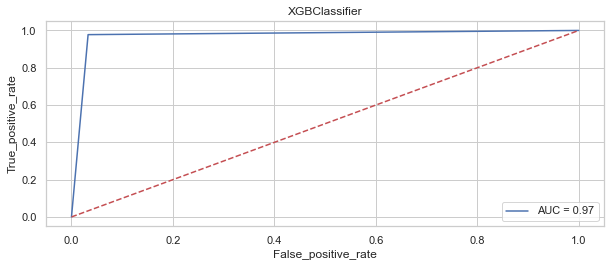

In [43]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
logloss=[]
#For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix,logloss

for name,model in models:
    print('**',name,'**')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
#calling a function which will calculate the max accuracy score for each model and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    
#Accuracy Score
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    
#Finding Cross_val_score 
    cv_score=cross_val_score(model,x,y,cv=10,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#Roc auc score  
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
#logloss
    loss = log_loss(y_test,y_pred)
    print('Log loss : ', loss)
    logloss.append(loss)
    
#Classification Report     
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    

    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [44]:
scores=pd.DataFrame({'Model': Model,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Log_Loss':logloss,
                     'Roc_Auc_curve':rocscore}) 
scores.style.background_gradient(cmap='Spectral')

,Model,Accuracy Score,Cross Val Score,Log_Loss,Roc_Auc_curve
0,LogisticRegression,95.424627,99.029661,1.580296,95.424602
1,MultinomialNB(),89.725478,97.872497,3.548702,89.721424
2,DecisionTreeClassifier,92.936266,92.534160,2.439758,92.936543
3,RandomForestClassifier,94.043988,98.760625,2.057148,94.042865
4,AdaBoostClassifier,94.589822,98.428240,1.868631,94.589844
5,XGBClassifier,97.238722,99.591909,0.953725,97.238969


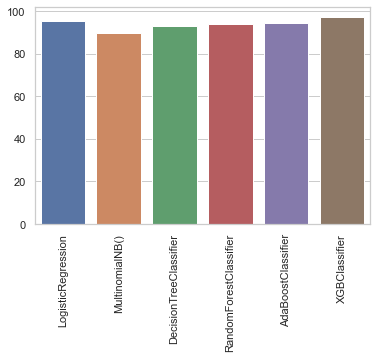

In [45]:
plt.xticks(rotation=90)
sns.barplot(x=Model,y=Acc_score);

In [46]:
### We choose XGBoost Classifier model as the final one,as it gives hightest accuracy score & also log_loss value is minimum which indicates better prediction

In [47]:
# Using XGBClassifier for final model...
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=83,test_size=.30)
XG=XGBClassifier(eval_metric='mlogloss')
XG.fit(x_train,y_train)
XG.score(x_train,y_train)
XGpred=XG.predict(x_test)
print('Accuracy Score:','\n',accuracy_score(y_test,XGpred))
print('Log_Loss:','\n',log_loss(y_test,XGpred))
print('Confusion Matrix:','\n',confusion_matrix(y_test,XGpred))
print('Classification Report:','\n',classification_report(y_test,XGpred))

G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy Score: 
 0.9693369722266817
Log_Loss: 
 1.0590765532775446
Confusion Matrix: 
 [[3017  102]
 [  89 3021]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3119
           1       0.97      0.97      0.97      3110

    accuracy                           0.97      6229
   macro avg       0.97      0.97      0.97      6229
weighted avg       0.97      0.97      0.97      6229



In [48]:
# Printing predicted values
pred_value=pd.DataFrame(data=y_test,)
pred_value['Predicted values']=XGpred
pred_value

,label,Predicted values
15583,1,1
11115,0,0
7115,1,1
9514,0,0
7059,0,0
...,...,...
8378,0,0
181,1,1
2110,1,1
14803,1,1


In [49]:
# Saving the best model.
import joblib
joblib.dump(XG,'Fake_news_Predict.pkl')

['Fake_news_Predict.pkl']

In [50]:
# Saving the Predicted values in csv file
pred_value.to_csv('Fake_news_Prediction.csv')